In [75]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection
from scipy.optimize import curve_fit

In [70]:
os.listdir()


['1.asc',
 '10.asc',
 '100.asc',
 '110.asc',
 '12.asc',
 '120.asc',
 '130.asc',
 '14.asc',
 '140.asc',
 '150.asc',
 '16.asc',
 '18.asc',
 '2.asc',
 '20.asc',
 '200.asc',
 '25.asc',
 '250.asc',
 '3.asc',
 '30.asc',
 '300.asc',
 '35.asc',
 '4.asc',
 '40.asc',
 '45.asc',
 '5.asc',
 '50.asc',
 '55.asc',
 '6.asc',
 '60.asc',
 '65.asc',
 '7.asc',
 '70.asc',
 '75.asc',
 '8.asc',
 '80.asc',
 '85.asc',
 '9.asc',
 '90.asc',
 '95.asc']

In [61]:
os.chdir('..')

In [63]:
os.chdir(os.listdir()[1])

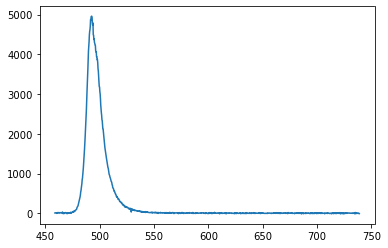

In [54]:
df = pd.read_csv(os.listdir()[5], delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
plt.plot(df.iloc[:,0],df.iloc[:,1])

In [78]:
def lorentzian(x, a, x0,fwhm):
    gamma = fwhm / 2.0
    return a * gamma**2 / ((x - x0)**2 + gamma**2) 


Text(0.5, 0, 'Power(uW)')

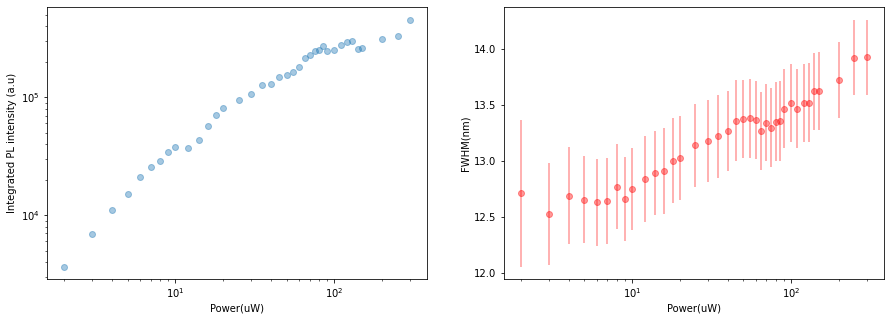

In [90]:
xmin = 480
xmax = 520
powers = []
width = []
uncs = []
power_counts = []
for file in os.listdir()[1:-1]:
    df = pd.read_csv(file, delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
    x1 = df.columns[0]
    y1 = df.columns[1]
    w = df[x1]
    c = df[y1]
    mask = (w>xmin)&(w<xmax)
    p = np.sum(c[mask])
    power_counts.append(p)
    power = file.strip('uW.asc')
    powers.append(power)
    p0 = [3000, 500, 30] 
    params, unc = curve_fit(lorentzian, w[mask], c[mask], p0=p0)
    uncs.append(np.sqrt(np.diag(unc))[2])
    width.append(params[2])
p_s = (np.array(powers)).astype(int)
c_s = np.array(power_counts)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.loglog(p_s, c_s,'o',label='power_run',alpha=0.4)
ax1.set_xlabel('Power(uW)')
ax1.set_ylabel('Integrated PL intensity (a.u)')
ax2.errorbar(p_s,width,yerr =uncs, fmt='o', color = 'red',alpha = 0.4)
ax2.set_xscale('log')
ax2.set_ylabel('FWHM(nm)')
ax2.set_xlabel('Power(uW)')
#plt.title('power_run')


In [33]:
df = pd.read_csv(file, delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])

In [14]:
print(np.sort(nppowers))



NameError: name 'nppowers' is not defined

Text(500, 0.05, '494nm')

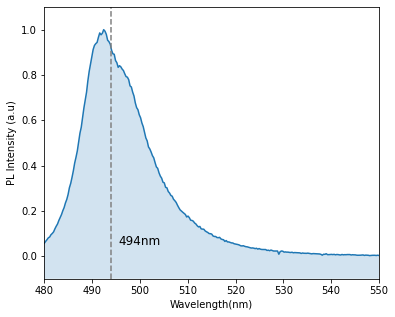

In [96]:
x1 = df.columns[0]
y1 = df.columns[1]
c = df[y1]/max(df[y1])
fig, axs = plt.subplots(1, 1, figsize=(6,5))
axs.plot(df[x1], c, label='spectrum')
axs.fill_between(df[x1], -0.1, c, alpha=0.2)
axs.set_xlabel('Wavelength(nm)')
axs.set_ylabel('PL Intensity (a.u)')
axs.set_xlim(480,550)
axs.set_ylim(-0.1,max(c)+0.1)
axs.axvline(x=494, linestyle='--', color='grey')
axs.text(500, 0.05, '494nm', ha='center', fontsize=12)

In [69]:
ps



array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 16, 18, 20])

<function matplotlib.pyplot.show(close=None, block=None)>

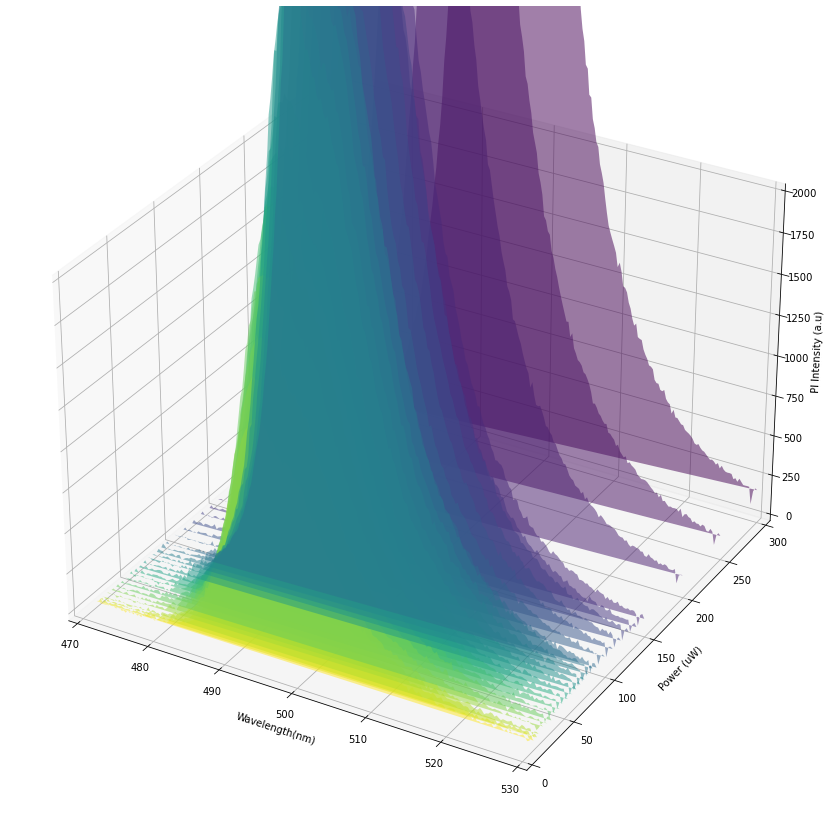

In [93]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
datas = []
xmin = 470
xmax = 530
ps = p_s
ps.sort()
ps = ps[10:]
for z in ps:
    df = pd.read_csv(str(z)+'.asc', delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
    w = df.iloc[:,0]
    c = df.iloc[:,1]
    mask = (w>xmin)&(w<xmax)
    dat = datas.append([*zip(w[mask], c[mask])])
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(datas)))
poly = PolyCollection(datas, facecolors=facecolors, alpha=.5)
ax.add_collection3d(poly, zs=ps, zdir='y')
ax.set(xlim=(xmin, xmax), ylim=(0, max(ps)),zlim=(0,2000),xlabel = 'Wavelength(nm)', zlabel = 'Pl Intensity (a.u)', ylabel = 'Power (uW)')
plt.show


In [76]:
def lorentzian(x, a, x0,fwhm):
    gamma = fwhm / 2.0
    return a * gamma**2 / ((x - x0)**2 + gamma**2) 


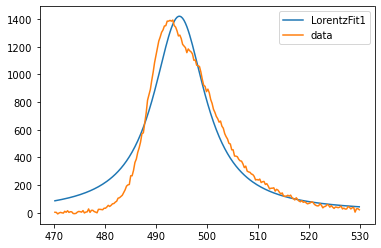

In [77]:
p0 = [3000, 500, 30] 
params, _ = curve_fit(lorentzian, w[mask], c[mask], p0=p0)
plt.plot(w[mask], lorentzian(w[mask], *params), label='LorentzFit1')
plt.plot(w[mask],c[mask],label='data')
plt.legend()

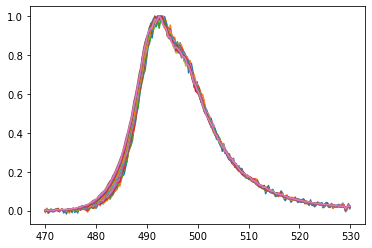

In [100]:
xmin = 470
xmax = 530
ps = p_s
ps.sort()
ps = ps[10:]
for z in ps:
    df = pd.read_csv(str(z)+'.asc', delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
    w = df.iloc[:,0]
    c = df.iloc[:,1]/max(df.iloc[:,1])
    mask = (w>xmin)&(w<xmax)
    plt.plot(w[mask],c[mask],label=z)

#plt.legend()